# Modelo de Hodking - Huxley para impulsos nerviosos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

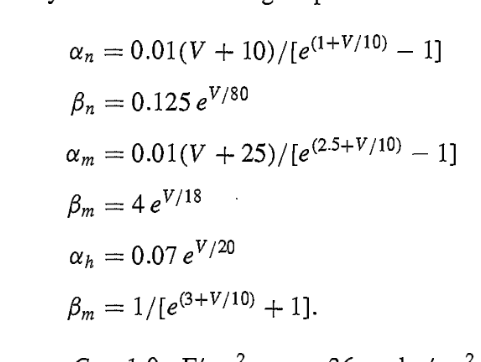

In [2]:
Vr=-70

In [3]:
def alfn(V):
  "alpha_n"
  return 0.01*(10-(V-Vr))/(np.exp(1-(V-Vr)/10)-1)

In [4]:
def betn(V):
  "betha_n"
  return 0.125*np.exp(-(V-Vr)/80)

In [5]:
def alfm(V):
  "alpha_m"
  return 0.1*(-(V-Vr)+25)/(np.exp(2.5-(V-Vr)/10)-1)

In [6]:
def betm(V):
  "betha_m"
  return 4*np.exp(-(V-Vr)/18)

In [7]:
def alfh(V):
  "alpha_h"
  return 0.07*np.exp(-(V-Vr)/20)

In [8]:
def beth(V):
  "betha_h"
  return 1/(np.exp(3-(V-Vr)/10)+1)

In [9]:
def Iext(t):
  "funcion arbritraria de corrientes externas que afecten el impulso nervioso"
  if (t>=0 and t<1) or t>2:
    return 0
  else:
    return 5.4

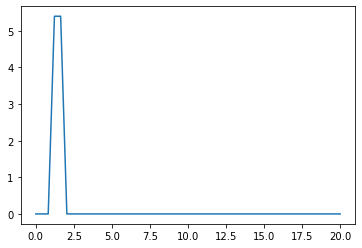

In [10]:
x=np.linspace(0,20,50)
y=[]
for i in x:
  y.append(Iext(i))
plt.plot(x,y)

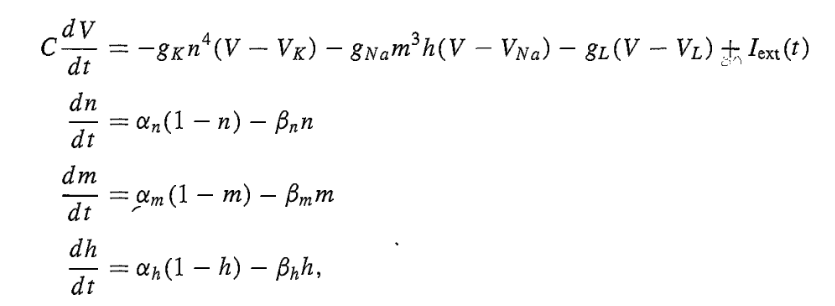

In [11]:
#y[0]=V, y[1]=n, y[2]=m, y[3]=h
def fderiv(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])

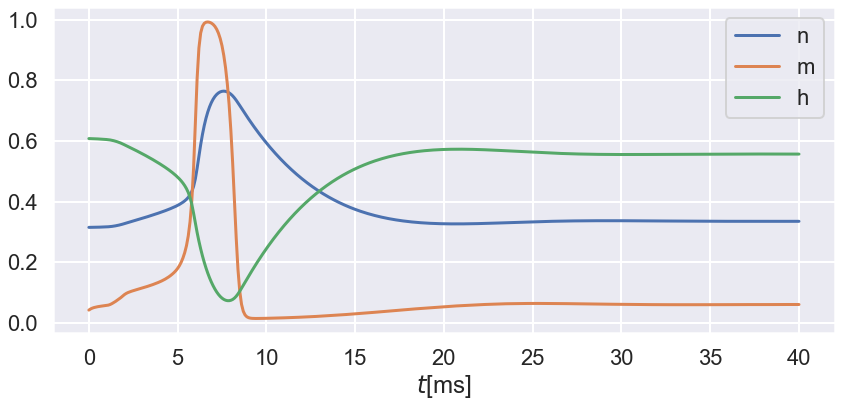

In [12]:
V0=-70
n0=0.315
m0=0.042
h0=0.608
T0=0
TF=40
DT=0.1

sol = solve_ivp(fderiv, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(14, 6))
#ax.plot(sol.t, sol.y[0], label=r"V")
ax.plot(sol.t, sol.y[1], label=r"n")
ax.plot(sol.t, sol.y[2], label=r"m")
ax.plot(sol.t, sol.y[3], label=r"h")
ax.set_xlabel(r"$t$[ms]")
ax.legend()

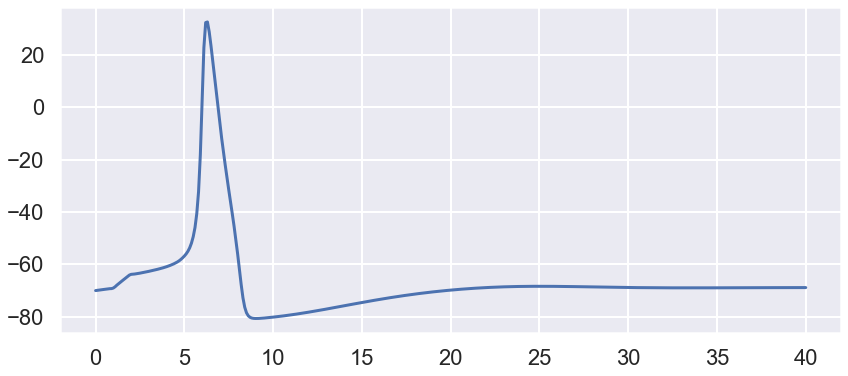

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sol.t, sol.y[0], label=r"V")

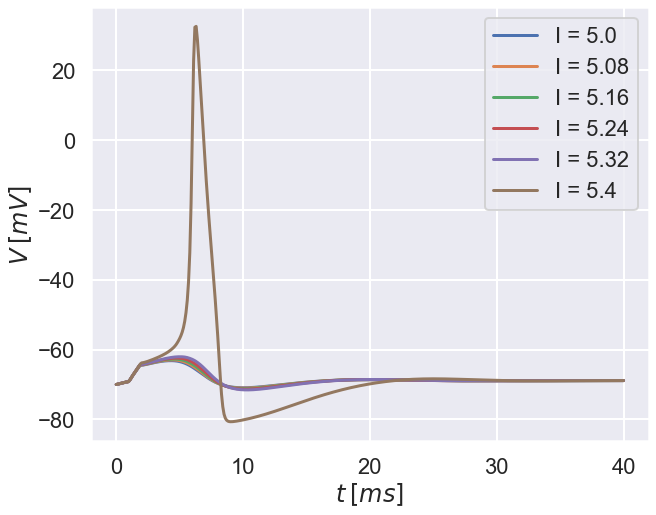

In [14]:
def Iext1(t, c):
  "funcion arbritraria de corrientes externas que afecten el impulso nervioso"
  if (t>=0 and t<1) or t>2:
    return 0
  else:
    return c

def fderiv1(t, y, C, gk, Vk, gNa, VNa, gL, VL, c): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + Iext1(t, c)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(10,8))
I = np.linspace(5, 5.4, 6)
for ii in I:
  sol1 = solve_ivp(fderiv1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59, ii))
  ax.plot(sol1.t, sol1.y[0], label=f"I = {ii}")
  ax.set_ylabel(f"$V\:[mV]$")
  ax.set_xlabel(f"$t\:[ms]$")
  ax.legend()

# COMIENZAN A HABER PICOS DESDE I_EXT = 5.4 ###

<ipython-input-3-a3fcf00e5e62>:3: RuntimeWarning: overflow encountered in exp
  return 0.01*(10-(V-Vr))/(np.exp(1-(V-Vr)/10)-1)


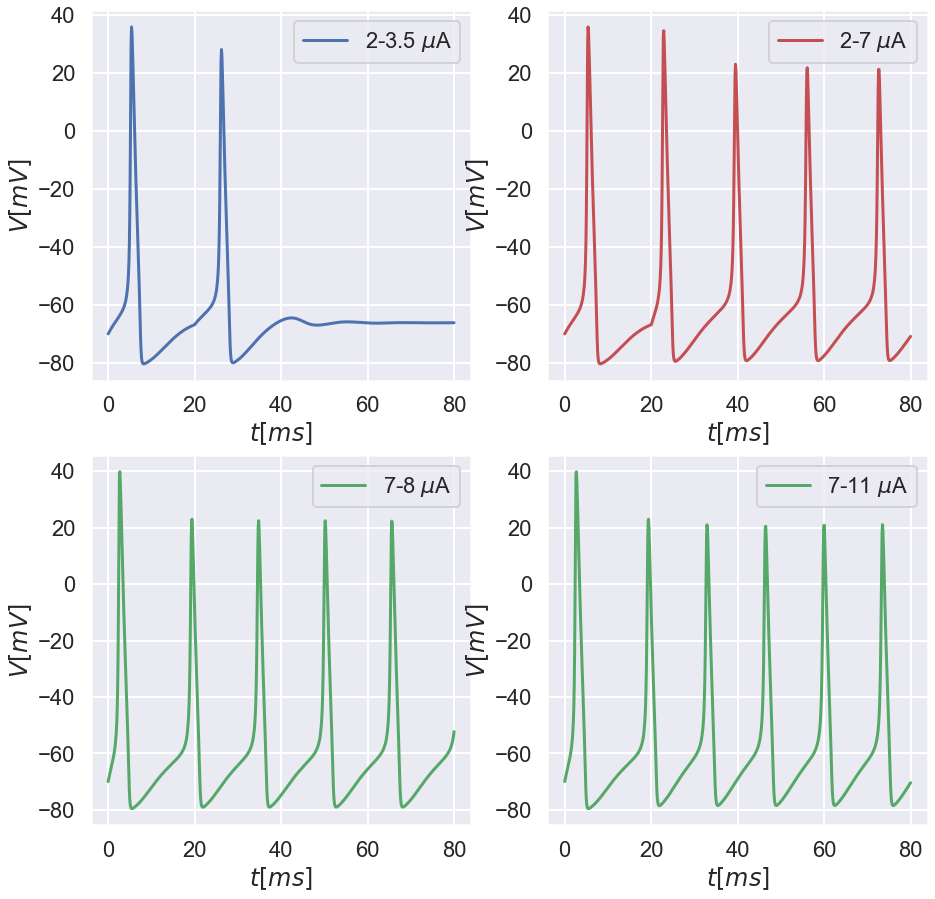

In [15]:
def d1Iext(t):
  if  t<20:
    return 2
  else:
    return 3.5
def d2Iext(t):
  if  t<20:
    return 2
  else:
    return 7
def d3Iext(t):
  if  t<20:
    return 7
  else:
    return 8
def d4Iext(t):
  if  t<20:
    return 7
  else:
    return 11
T0=0
TF=80
  
def fderivdelta1(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d1Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
def fderivdelta2(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d2Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
def fderivdelta3(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d3Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])  
def fderivdelta4(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d4Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15))
figsize=(10,8)
sol1 = solve_ivp(fderivdelta1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol2 = solve_ivp(fderivdelta2, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol3 = solve_ivp(fderivdelta3, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol4 = solve_ivp(fderivdelta4, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
ax1.plot(sol1.t, sol1.y[0],"b",label=r"2-3.5 $\mu$A")
ax2.plot(sol2.t, sol2.y[0],"r",label=r"2-7 $\mu$A")
ax3.plot(sol3.t, sol3.y[0],"g",label=r"7-8 $\mu$A")
ax4.plot(sol4.t, sol4.y[0],"g",label=r"7-11 $\mu$A")
ax1.set_ylabel("$V[mV]$")
ax1.set_xlabel("$t[ms]$")
ax2.set_ylabel("$V[mV]$")
ax2.set_xlabel("$t[ms]$")
ax3.set_ylabel("$V[mV]$")
ax3.set_xlabel("$t[ms]$")
ax4.set_ylabel("$V[mV]$")
ax4.set_xlabel("$t[ms]$")
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
